In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sales_predictor import SalesPredictor
from simple_market import MarketEnv, MarketAgent
from trainer import train

np.random.seed(47)
plt.rcParams['figure.figsize'] = [14, 8]

### Build Environment

Load forecasting model.

In [2]:
model_path = os.path.join("data", "sales_model.pkl")
sales_predictor = pickle.load(open(model_path, "rb"))

In [3]:
prime_cost = 100
min_price, max_price = prime_cost, prime_cost * 6

In [4]:
env = MarketEnv(sales_predictor, prime_cost)

In [5]:
sales_predictor

SalesPredictor() with LinearRegression()

### Train Agent

Tune hyperparameters in order to maximize agent's cummulative reward.

In [6]:
# TODO: Your code here
learning_rate=0.997 # alpha
discount_factor=0.996 # gamma
exploration_rate=0.997 # epsilon
exploration_decay_rate=0.997
bins_number=14
episodes=5001

In [7]:
agent = MarketAgent(min_price, max_price, bins_number, learning_rate, discount_factor, exploration_rate,
                    exploration_decay_rate)

In [ ]:
# print(agent, episodes)
cum_rewards = train(env, agent, episodes)

Episode 0; Mean reward = 1158566.8532607937
Episode 500; Mean reward = 1594410.780315143
Episode 1000; Mean reward = 1712192.3531590449


In [ ]:
cum_rewards_, episodes_ = [], []
for episode in range(0, episodes, 500):
    episodes_.append(episode)
    cum_rewards_.append(cum_rewards[episode])

plt.plot(episodes_, cum_rewards_)
plt.xlabel("Episode")
plt.ylabel("Mean Reward")

### RL vs Greedy strategy

In this section you should compare policy (function of time), which your agent has learned, with greedy policy, which maximizes 1-step reward. Greedy policy can be found analytically, assuming complete knowledge of the environment. To compute greedy policy use prime_cost and parameters from forecasting model (seasonality, bias and intercept). Note that your reward function is a profit (check the environment).

In [ ]:
seasonal = sales_predictor.seasonal[:52]

In [ ]:
# TODO: Your code here
def greedy_action(t):
    # Derivative would be eq = k1*(p - prime_cost) + (k0 + k1*p + s(t) + eps)*1 = k1*p - k1*prime_cost + k0 + k1*p + s(t) + eps
    # = 2k1*p - k1*prime_cost + k0 + s(t) + eps = 2k1*p - k1*prime_cost + k0 + s(t)
    prime_cost = 100
    min_price, max_price = prime_cost, prime_cost * 6
    k0, k1 = sales_predictor.residuals_model.intercept_, sales_predictor.residuals_model.coef_[0]
    s_t = seasonal[t]
    return (k1*prime_cost - k0 - s_t) / (2*k1)

Visualize greedy policy and agent's policy. Can you explain why they're pretty much the same?

In [ ]:
# prepare data for greedy_action
derivative_reward = {}
for t in range(52):
    derivative_reward[t] = greedy_action(t)
    
agent_actions = [agent.begin_episode(observation) for observation in range(52)]

In [ ]:
plt.rcParams['figure.figsize'] = 20, 5
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(derivative_reward.keys(), derivative_reward.values())
ax1.set_title('Greedy function of sales')
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Sales')
ax2.plot([i for i in range(52)], agent_actions)
ax2.set_title('Forecasted function of sales')
ax2.set_xlabel('Weeks')
ax2.set_ylabel('Sales')
plt.show();

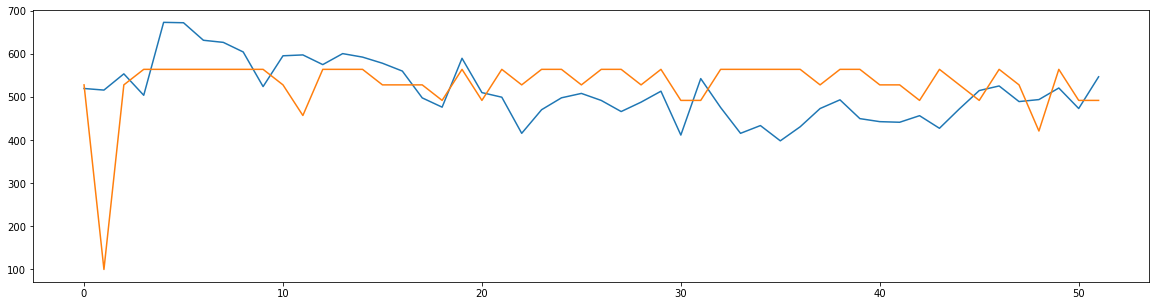

In [34]:
plt.plot(derivative_reward.keys(), derivative_reward.values())
plt.plot([i for i in range(52)], agent_actions)
# plt.set_title('Greedy function of sales')
# plt.set_xlabel('Weeks')
# plt.set_ylabel('Sales')
plt.show();